# 作業五 KMmeans

> `NCU MIS` `106403551` `呂晟維` 
這次作業都是寫過程，所以直接把程式碼的.ipynb複製貼上到pdf唷

1. 請用 python 依照步驟對 BreastCancer.csv 進行 KMeans 分析，過程中對所有重要程式步驟進行截圖並加以說明。 (60%)
    - (a) 將 radius_mean 及 area_mean 切為 feature diagnosis 切為 target
    - (b) 用 cluster.Means 設 n_clusters=2
    - (c) 用 fit_predict 對 feature 進行分類
    - (d) 運用 matplotlib 中的 scatter 圖， x 軸設為 radius_mean y 軸設為 area_mean，c 設為分群結果，印出分類圖形
    - (e) 移除 area_mean 中大於 2000 的資料
    - (f) 重複上述動作印出分類圖形
2. 請用 weka 對 BreastCancer.csv，進行 simplekMeans 分析 Cluster mode 設為 Use training set，numClusters 設為 2。 (40%)
    - (a) 印出 KMeans 分類結果兩類的數目
    - (b) 運用 Visualize cluster 得到與上述 python 印出之圖形(未進行刪減前)類似的結果

## Python部分

### a. Read & Divid dataset into Features and Target
- Feature: radius_mean, area_mean
- Target: diagnosis

In [1]:
import pandas as pd
df = pd.read_csv("BreastCancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
len(df)

569

Divid dataset into Features and Target. Target's data is Nominal `M` `B`, here we convert to `1` and `0`.

In [3]:
feature = df[["radius_mean","area_mean"]]
target  = df["diagnosis"]

In [4]:
target = target.replace('M', 1).replace('B', 0)
target.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

### b. 用 cluster.Means 設 n_clusters=2 
- 官方文件參數介紹: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- 官方文件文字介紹: https://scikit-learn.org/stable/modules/clustering.html#k-means
- 手刻+套件[機器學習- K-means clustering in Python](https://medium.com/@a4793706/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-k-means-clustering-in-python-%E9%99%84%E7%A8%8B%E5%BC%8F%E7%A2%BC%E4%BB%8B%E7%B4%B9-55c19bcf2280)

KMeans初始的中心點是相當重要的，整體算法會更著中心點更近，若是因為中心點設得不好，出來的結果也會不好，且在數距複雜且龐大下，算法優化的次數會更多，所耗的時間成本也就越高。
那要解決中心點問題可以依靠k-maens++，也就是大家往上看當我們fit的時候init=k-means++ ，k-means++的方法就是讓初始中心之間的距離盡可能地遠使得加速 迭代過程的收斂。

In [5]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0).fit(feature)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

**Coordinates of cluster centers.**

In [6]:
kmeans.cluster_centers_

array([[  12.59721124,  499.66696629],
       [  19.61830645, 1211.93629032]])

**Labels of each point**

In [7]:
kmeans.labels_

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

### c. 用 fit_predict 對 feature 進行分類
`fit_predict`: Compute cluster centers and predict cluster index for each sample. Result is **same as** `kmeans.labels_`.

In [8]:
predict = kmeans.fit_predict(feature)
predict

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

### d. 運用 matplotlib 中的 scatter 圖， x 軸設為 radius_mean y 軸設為 area_mean，c 設為分群結果，印出分類圖形

官網matplotlib.pyplot.scatter: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
- A scatter plot of y vs x with varying marker size and/or color. 
- 輸入X和Y作為每個點的location
- c是點的顏色，這裡用1和0表示

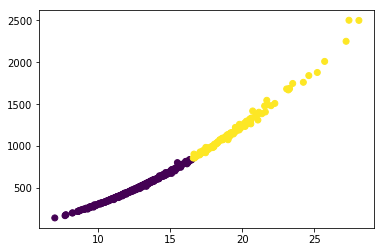

In [10]:
import matplotlib.pyplot as plt

plt.scatter(feature['radius_mean'], feature['area_mean'], c = predict)

### e. Remove area_mean 中大於 2000 的資料

In [11]:
feature = feature[feature.area_mean <= 2000]

###  f. 重複上述動作印出分類圖形

We re-fit the KMeans model with new data. And plot the clusters with scatter plot.

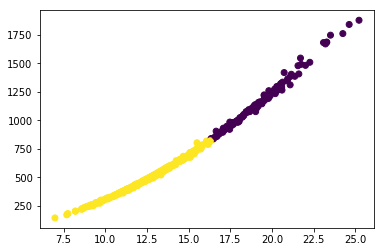

In [12]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(feature)
predict = kmeans.fit_predict(feature)

plt.scatter(feature['radius_mean'], feature['area_mean'], c = predict)

Now we have another question. **Why the color of 2 clusters changed?**

By checking the prediction array, we find out the **new** array starts with `0`, meaning color `yellow`. However the **original** clustering array starts with `1`, meaning color `purple`.

By the way, the second **cluster center** changes **a lot**, which points that KMeans is affected by **extreme values** easily.

In [13]:
kmeans.cluster_centers_

array([[  19.32      , 1169.66065574],
       [  12.57993002,  498.13386005]])

In [14]:
kmeans.labels_ # equils to the result array 'predict'

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,